In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("vgsales.csv")

In [6]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.shape

(16598, 11)

In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
df.isnull().values.any()

np.True_

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Length: 16598, dtype: bool

In [9]:
unique_genres = df['Genre'].unique()
print(unique_genres)

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


C:\Users\User\AppData\Local\Temp\ipykernel_3228\207992158.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


Bar chart has been generated and saved as 'genre_distribution_barchart.png'

Genre Counts:
Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64


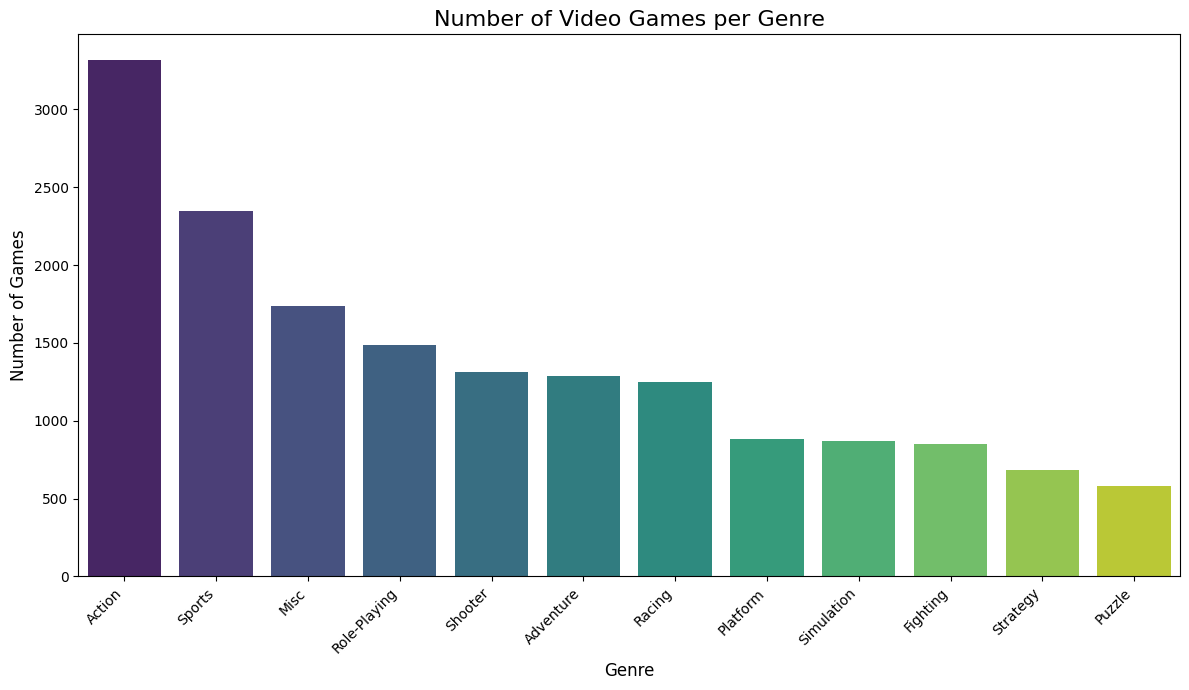

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 2. Get the Counts for Each Genre ---
# .value_counts() automatically counts the occurrences of each unique genre and sorts them.
genre_counts = df['Genre'].value_counts()


# --- 3. Create the Bar Graph ---
# Set the figure size for better readability
plt.figure(figsize=(12, 7))

# Create the bar plot using seaborn
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')

# Add a title and labels for clarity
plt.title('Number of Video Games per Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)

# Rotate the x-axis labels to prevent them from overlapping
plt.xticks(rotation=45, ha='right')

# Ensure the layout is tight so labels don't get cut off
plt.tight_layout()

# Save the plot to a file
plt.savefig('genre_distribution_barchart.png')

print("Bar chart has been generated and saved as 'genre_distribution_barchart.png'")
print("\nGenre Counts:")
print(genre_counts)

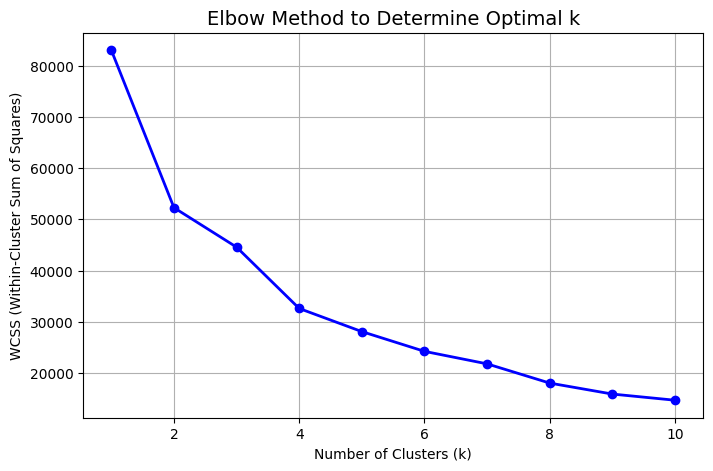


📈 Elbow Graph plotted successfully!
👉 Look for the 'elbow point' — where the curve starts to flatten. That k is the optimal number of clusters.


In [11]:
wcss = []  # Within Cluster Sum of Squares
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bo-', linewidth=2)
plt.title('Elbow Method to Determine Optimal k', fontsize=14)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

print("\n📈 Elbow Graph plotted successfully!")
print("👉 Look for the 'elbow point' — where the curve starts to flatten. That k is the optimal number of clusters.")

In [26]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Genre_encoded'] = le.fit_transform(df['Genre'])
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_encoded
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,10
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,6
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,10
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,7


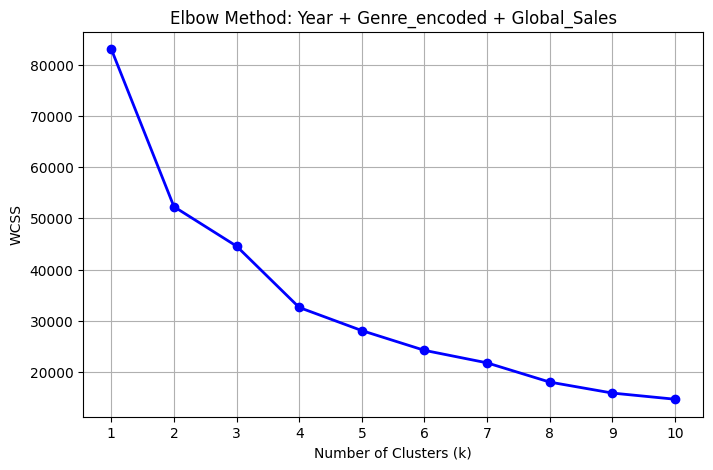

In [32]:
#==============================================================
# STEP 6: COMPUTE WCSS FOR ELBOW METHOD
# ==============================================================

wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# ==============================================================
# STEP 7: PLOT ELBOW GRAPH
# ==============================================================

plt.figure(figsize=(8,5))
plt.plot(K, wcss, 'bo-', linewidth=2)
plt.title('Elbow Method: Year + Genre_encoded + Global_Sales')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(K)
plt.grid(True)
plt.show()

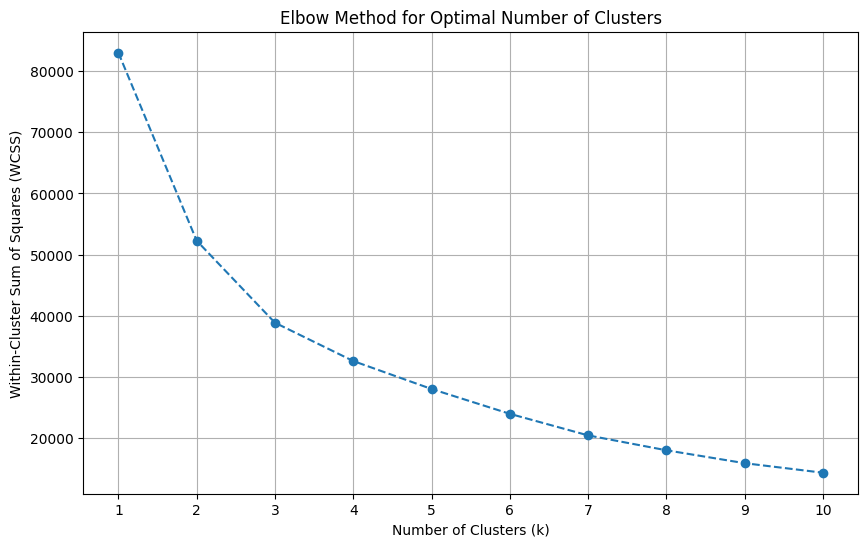

In [34]:
wcss = []
cluster_range = range(1, 11)  # Checking for k from 1 to 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS value

# 5. Plot the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


✅ K-Means clustering completed. Sample data with cluster labels:
   Year  Genre_encoded  Global_Sales  Cluster
0  2006             10         82.74        1
1  1985              4         40.24        1
2  2008              6         35.82        1
3  2009             10         33.00        1
4  1996              7         31.37        1


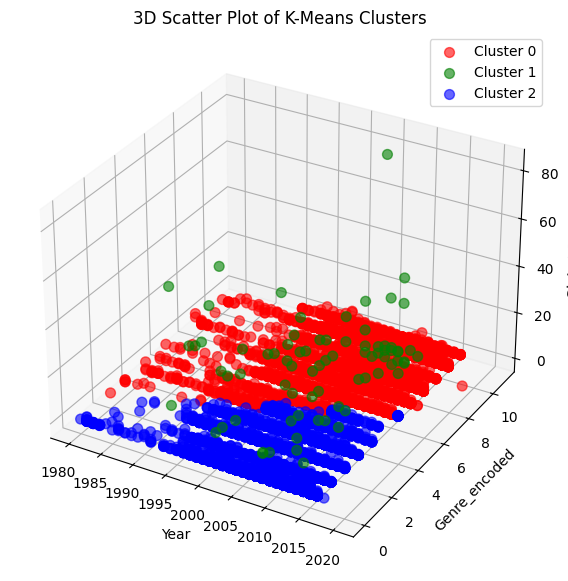

In [46]:
# STEP 1: Select features and drop NaNs
features = df[['Year', 'Genre_encoded', 'Global_Sales']].dropna().copy()

# STEP 2: Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# STEP 3: Run K-Means
from sklearn.cluster import KMeans
optimal_k = 3  # replace with elbow point
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# STEP 4: Add cluster labels to the SAME dataframe used for scaling
features['Cluster'] = cluster_labels

print("✅ K-Means clustering completed. Sample data with cluster labels:")
print(features.head())

# STEP 5: 3D Scatter Plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta']

for cluster in range(optimal_k):
    cluster_data = features[features['Cluster'] == cluster]
    ax.scatter(
        cluster_data['Year'],
        cluster_data['Genre_encoded'],
        cluster_data['Global_Sales'],
        s=50,
        color=colors[cluster % len(colors)],
        label=f'Cluster {cluster}',
        alpha=0.6
    )

ax.set_title('3D Scatter Plot of K-Means Clusters')
ax.set_xlabel('Year')
ax.set_ylabel('Genre_encoded')
ax.set_zlabel('Global Sales')
ax.legend()
plt.show()


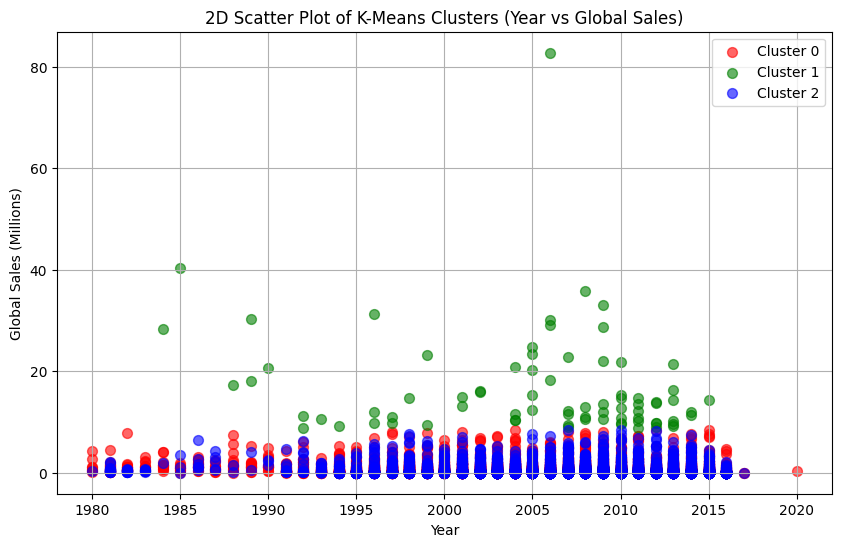

In [47]:
# ==============================================================
# 2D Scatter Plot of K-Means Clusters
# ==============================================================

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot each cluster separately
for cluster in range(optimal_k):
    cluster_data = features[features['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Year'],
        cluster_data['Global_Sales'],
        s=50,
        color=colors[cluster % len(colors)],
        label=f'Cluster {cluster}',
        alpha=0.6
    )

plt.title('2D Scatter Plot of K-Means Clusters (Year vs Global Sales)')
plt.xlabel('Year')
plt.ylabel('Global Sales (Millions)')
plt.legend()
plt.grid(True)
plt.show()



--- Applying K-Means with K=3 ---
✅ K-Means clustering complete. Sample data with cluster labels:
   Year  Genre_encoded  Global_Sales  Cluster
0  2006             10         82.74        1
1  1985              4         40.24        1
2  2008              6         35.82        1
3  2009             10         33.00        1
4  1996              7         31.37        1

--- Cluster Centroids (Common Points) ---
          Year  Genre_encoded  Global_Sales  Cluster
0  2005.429232       8.240394      0.511548        0
1  2004.974026       5.428571     16.626234        1
2  2007.421505       1.524919      0.415297        2


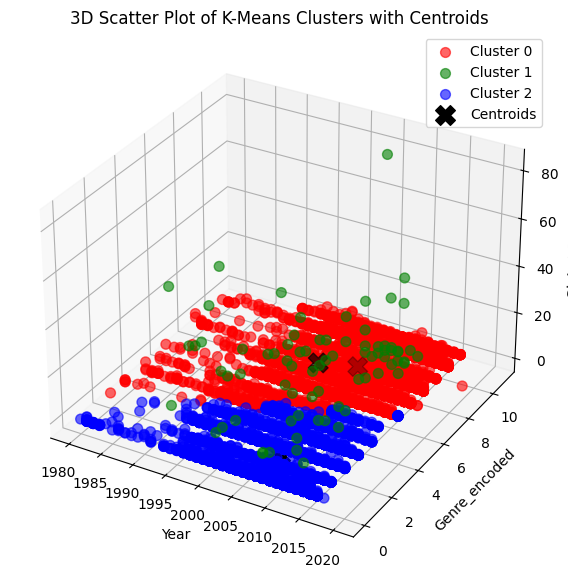

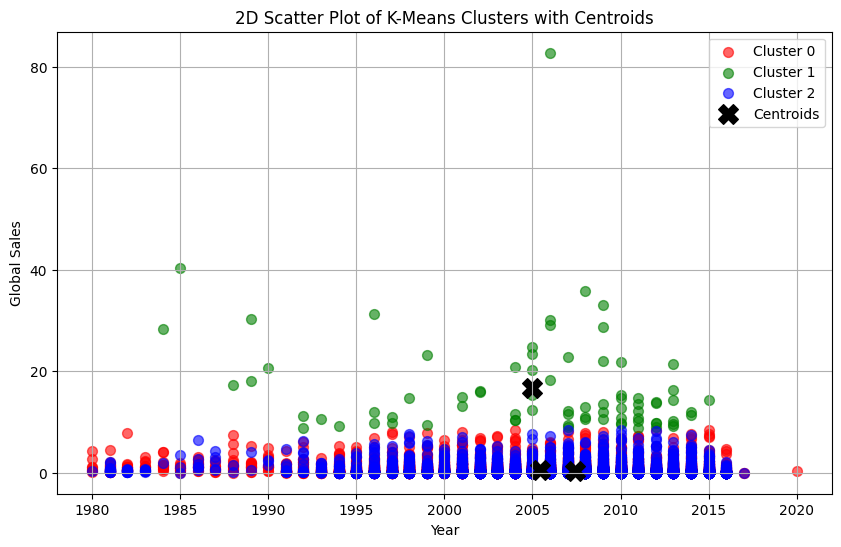

In [49]:
# ==============================================================
# --- Step 5: Apply K-Means with Optimal K ---
# ==============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

# Assume 'features' dataframe exists with ['Year', 'Genre_encoded', 'Global_Sales']

# Choose optimal_k from elbow
optimal_k = 3
print(f"\n--- Applying K-Means with K={optimal_k} ---")

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features[['Year', 'Genre_encoded', 'Global_Sales']])

# Fit K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Assign cluster labels
features['Cluster'] = cluster_labels

print("✅ K-Means clustering complete. Sample data with cluster labels:")
print(features.head())

# ==============================================================
# --- Step 6: Cluster Centroids (Common Points) ---
# ==============================================================

# Centroids in scaled space
centroids_scaled = kmeans.cluster_centers_

# Convert centroids back to original scale
centroids_original = scaler.inverse_transform(centroids_scaled)
centroids_df = pd.DataFrame(centroids_original, columns=['Year', 'Genre_encoded', 'Global_Sales'])
centroids_df['Cluster'] = range(optimal_k)

print("\n--- Cluster Centroids (Common Points) ---")
print(centroids_df)

# ==============================================================
# --- Step 7: 3D Scatter Plot with Centroids ---
# ==============================================================

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta']

# Plot each cluster
for cluster in range(optimal_k):
    cluster_data = features[features['Cluster'] == cluster]
    ax.scatter(
        cluster_data['Year'],
        cluster_data['Genre_encoded'],
        cluster_data['Global_Sales'],
        s=50,
        color=colors[cluster % len(colors)],
        label=f'Cluster {cluster}',
        alpha=0.6
    )

# Plot centroids
ax.scatter(
    centroids_df['Year'],
    centroids_df['Genre_encoded'],
    centroids_df['Global_Sales'],
    s=200,
    c='black',
    marker='X',
    label='Centroids'
)

ax.set_title('3D Scatter Plot of K-Means Clusters with Centroids')
ax.set_xlabel('Year')
ax.set_ylabel('Genre_encoded')
ax.set_zlabel('Global Sales')
ax.legend()
plt.show()

# ==============================================================
# --- Step 8: Optional 2D Scatter Plot (Year vs Global Sales) ---
# ==============================================================

plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = features[features['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Year'],
        cluster_data['Global_Sales'],
        s=50,
        color=colors[cluster % len(colors)],
        label=f'Cluster {cluster}',
        alpha=0.6
    )

# Plot centroids in 2D as well
plt.scatter(
    centroids_df['Year'],
    centroids_df['Global_Sales'],
    s=200,
    c='black',
    marker='X',
    label='Centroids'
)

plt.title('2D Scatter Plot of K-Means Clusters with Centroids')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.legend()
plt.grid(True)
plt.show()


In [50]:
# --- Analyze Clusters: Most Common Genre & Average Values ---

print("\n--- Cluster Analysis ---")

for cluster in range(optimal_k):
    cluster_data = features[features['Cluster'] == cluster]
    
    # Most common genre in this cluster
    most_common_genre_encoded = cluster_data['Genre_encoded'].mode()[0]
    # Convert back to original genre name
    most_common_genre = df.loc[df['Genre_encoded'] == most_common_genre_encoded, 'Genre'].mode()[0]
    
    # Average Year and Global Sales
    avg_year = cluster_data['Year'].mean()
    avg_sales = cluster_data['Global_Sales'].mean()
    
    print(f"\nCluster {cluster}:")
    print(f"Most Common Genre: {most_common_genre}")
    print(f"Average Year: {avg_year:.1f}")
    print(f"Average Global Sales: {avg_sales:.2f} million")
    print(f"Number of Games: {len(cluster_data)}")



--- Cluster Analysis ---

Cluster 0:
Most Common Genre: Sports
Average Year: 2005.4
Average Global Sales: 0.51 million
Number of Games: 8224

Cluster 1:
Most Common Genre: Shooter
Average Year: 2005.0
Average Global Sales: 16.63 million
Number of Games: 77

Cluster 2:
Most Common Genre: Action
Average Year: 2007.4
Average Global Sales: 0.42 million
Number of Games: 8026
